In [42]:
import mediapipe as mp
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [43]:
mp_hands = mp.solutions.hands
mp_drawing = mp.solutions.drawing_utils
mesh_drawing_spec = mp_drawing.DrawingSpec(thickness=2, color=(0, 255, 0))
mark_drawing_spec = mp_drawing.DrawingSpec(thickness=3, circle_radius=3, color=(0, 0, 255))

In [44]:
img_path = "hand4.jpg"

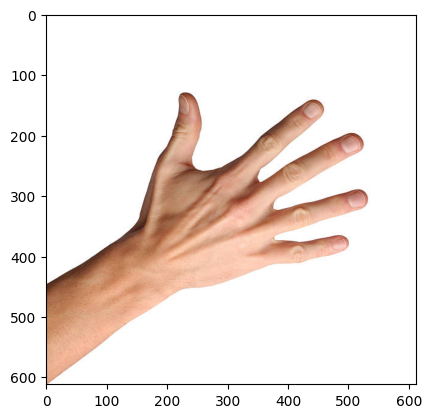

In [45]:
plt.imshow(plt.imread(img_path))

## mediapipeによるての検出 

In [46]:
with mp_hands.Hands(
        max_num_hands=2,
        min_detection_confidence=0,
        static_image_mode=True) as hands_detection:
    
    image = cv2.imread(img_path)
    # image = cv2.resize(image, dsize=None, fx=0.3, fy=0.3)
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height = rgb_image.shape[0]
    width = rgb_image.shape[1]
    
    results = hands_detection.process(rgb_image)
    
    # 加工用として元画像をコピー
    annotated_image = image.copy()

## 検出したてにランドマークを描画

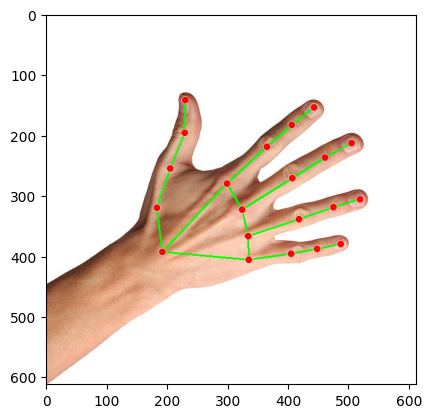

In [47]:
for hand_landmarks in results.multi_hand_landmarks:
    # for id, lm in enumerate(hand_landmarks.landmark):
    #     print(id, lm.x)
    mp_drawing.draw_landmarks(
        image=annotated_image,
        landmark_list=hand_landmarks,
        connections=mp_hands.HAND_CONNECTIONS,
        landmark_drawing_spec=mark_drawing_spec,
        connection_drawing_spec=mesh_drawing_spec
        )
    # cv2.imwrite("result.jpg", annotated_image)
    #annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
    plt.imshow(annotated_image)

## 検出した手の人差し指の先端にTEXTを描画

In [48]:
# 元画像のサイズ
image_h, image_w, _d = image.shape
print(f"元画像の高さ： {image_h}")
print(f"元画像の幅： {image_w}")

元画像の高さ： 612
元画像の幅： 612


In [49]:
# 座標を画像の解像度に変換
x = int(results.multi_hand_landmarks[0].landmark[8].x * annotated_image.shape[0])
y = int(results.multi_hand_landmarks[0].landmark[8].y * annotated_image.shape[1])
print(f"人差し指の先端のx座標： {x}")
print(f"人差し指の先端のx座標： {y}")

人差し指の先端のx座標： 443
人差し指の先端のx座標： 154


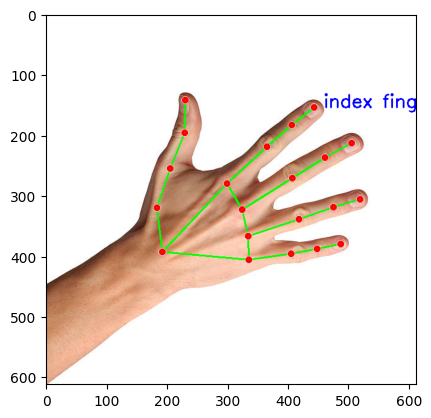

In [51]:
cv2.putText(annotated_image,
            text=' index finger',
            org=(x, y),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=1.0,
            color=(0, 0, 255),
            thickness=2,
            lineType=cv2.LINE_4)
rgb_annotated_image = cv2.cvtColor(annotated_image, cv2.COLOR_BGR2RGB)
plt.imshow(annotated_image)